## 目标

**对movielens数据集进行探索性数据分析及数据预处理**

## 过程

In [1]:
%matplotlib inline
import numpy as np
from numpy import array, random, arange
import pandas as pd
from pandas import Series, DataFrame

### step1:导入数据
导入数据后，可以使用head()或tail()来查看表结构，如：  
```pythoN
df.head(10)  # 读取前十条数据
```

In [2]:
path = "C:/Users/Wang/datasets/movielens/"
movies = pd.read_csv(path + "movies.csv", sep=",")
ratings = pd.read_csv(path + "ratings.csv", sep=",")
links = pd.read_csv(path + "links.csv", sep=",")
tags = pd.read_csv(path + "tags.csv", sep=",")

### step2:准备数据

#### step2-A 数据探索
对数据进行描述统计，更好的理解数据特性

**Ratings**

In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [97]:
# 描述统计
ratings["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [98]:
ratings["rating"].skew()  # 样本值的偏度：skew < 0，数据集中在右侧，称为负偏态；相反的称为正偏态；skew = 0称为正态

-0.6371993892529214

In [99]:
ratings["rating"].kurt()  # 样本值的峰度：峰度包括正态分布（峰度值=3），厚尾（峰度值>3），瘦尾（峰度值<3）

0.12331407123922622

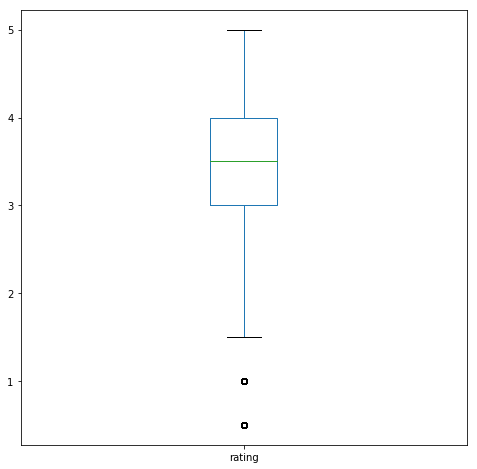

In [95]:
ratings["rating"].plot.box(figsize=(8, 8))

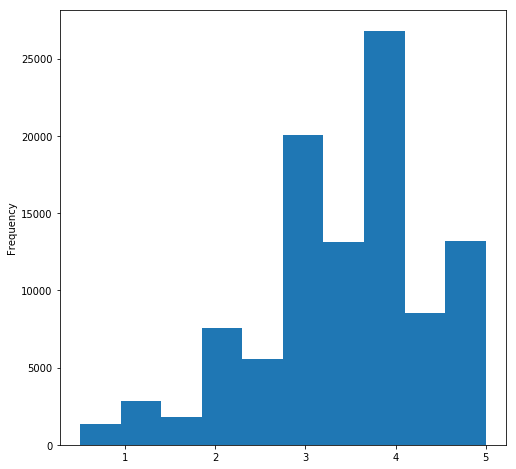

In [96]:
ratings["rating"].plot.hist(figsize=(8, 8))

In [78]:
over_rated = ratings["rating"] > 4.5
ratings[over_rated].shape[0]

13211

In [10]:
under_rated = ratings["rating"] < 1
ratings[under_rated].shape[0]

1370

**总结：**通过上述的分析可知评分大部分集中在3-5分之间，但是打出低分的用户仍不在少数  

**问题一：**用户讨厌哪些 电影？用户喜欢哪些电影？  
**问题二：**用户讨厌哪些 电影？用户喜欢哪些电影？  
**问题三：**如何为用户个性化的推荐电影？

**Movies**

In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
years = movies["title"].str.extract('.*\(([0-9]*)\)', expand=False)
years_count = years.value_counts().sort_index()
years_count.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

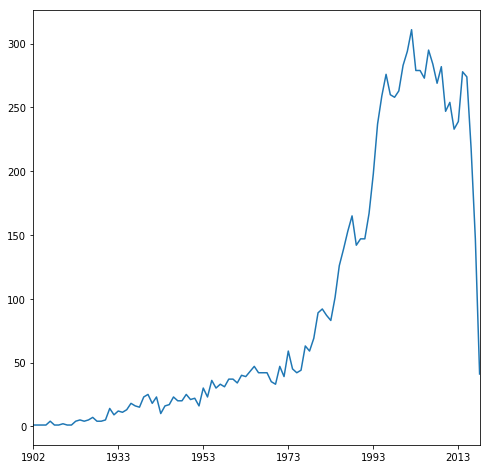

In [67]:
years_count.plot(figsize=(8, 8))

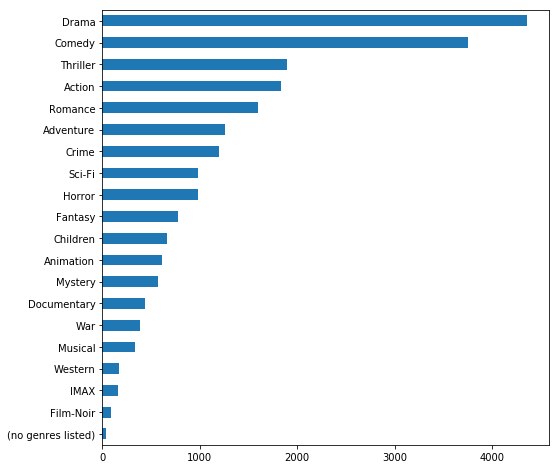

In [22]:
genres = movies["genres"].str.split('|', expand=True).stack()
genres_count = genres.value_counts().sort_values(ascending=True)
genres_count.plot.barh(figsize=(8, 8))

#### step2-B 数据预处理性
使数据可用于分析

In [42]:
movies.shape

(9742, 3)

In [29]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [44]:
ratings.shape

(100836, 4)

In [30]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [45]:
links.shape

(9742, 3)

In [35]:
links.isnull().any()

movieId    False
imdbId     False
tmdbId      True
dtype: bool

In [52]:
links[links["tmdbId"].isnull()]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


links表的tmdbId列中包含空值，由于数据量非常少且涉及到电影数据的获得，所以

In [90]:
tags.shape

(3683, 4)

In [92]:
tags.isnull().any()

userId       False
movieId       True
tag          False
timestamp    False
dtype: bool